In [1]:
import pandas as pd
from prophet import Prophet 
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [2]:
data = pd.read_feather('tavbase/Sample.feather')
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,OMonth,OPeriod,Order Date Month,sYear,sMonth,sPeriod,Ship Date Month,Delivery,Price,Benefit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,11,35,2016-11-01,2016,11,35,2016-11-01,3,130.98,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,11,35,2016-11-01,2016,11,35,2016-11-01,3,243.98,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,6,30,2016-06-01,2016,6,30,2016-06-01,4,7.31,1
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,10,22,2015-10-01,2015,10,22,2015-10-01,7,191.52,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,10,22,2015-10-01,2015,10,22,2015-10-01,7,11.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,1,1,2014-01-01,2014,1,1,2014-01-01,2,8.42,1
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,2,38,2017-02-01,2017,3,39,2017-03-01,5,45.98,1
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,2,38,2017-02-01,2017,3,39,2017-03-01,5,129.29,1
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,2,38,2017-02-01,2017,3,39,2017-03-01,5,7.40,1


In [3]:
## Função para o retorno do DataFrame de regrassão
def regressao(data, variable, orderVariable, regVariable):
    resposta = pd.DataFrame()
    for var in data[variable].unique():
        print(var)
        regressao = data[data[variable] == var][[orderVariable, regVariable]].groupby(orderVariable)[regVariable].sum().reset_index()
        regressao = regressao.rename(columns={orderVariable: 'ds', regVariable: 'y'})
        m = Prophet().fit(regressao)
        future = m.make_future_dataframe(periods=12, freq='MS')
        forecast = m.predict(future)
        # print(forecast)
        forecast[variable] = var 
        fig1 = m.plot(forecast)
        plt.show()
        resposta = resposta.append(
            forecast[[variable, 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
            ignore_index = True
        )
    return resposta

South


00:42:52 - cmdstanpy - INFO - Chain [1] start processing
00:42:54 - cmdstanpy - INFO - Chain [1] done processing


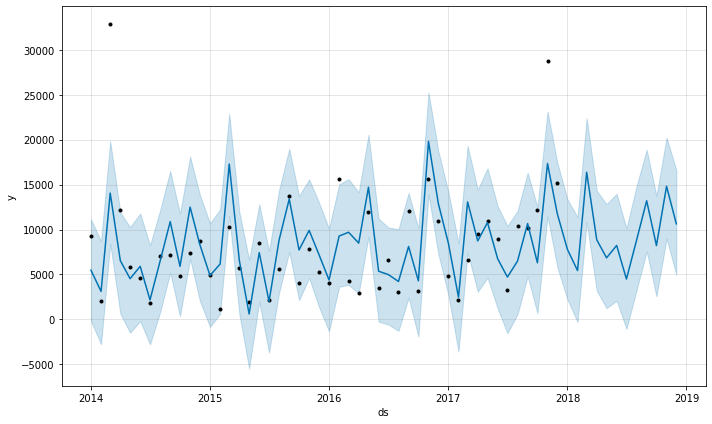

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
00:42:55 - cmdstanpy - INFO - Chain [1] start processing


West


00:42:55 - cmdstanpy - INFO - Chain [1] done processing


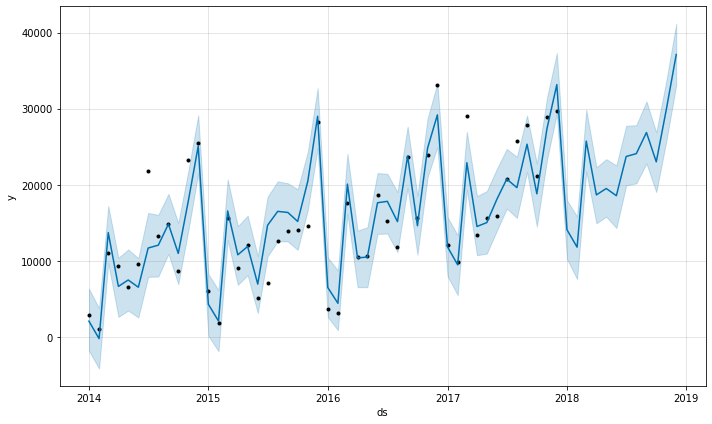

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
00:42:55 - cmdstanpy - INFO - Chain [1] start processing


Central


00:42:56 - cmdstanpy - INFO - Chain [1] done processing


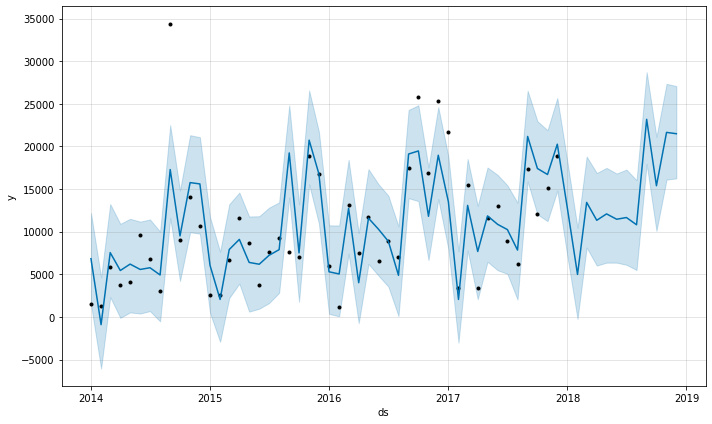

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
00:42:56 - cmdstanpy - INFO - Chain [1] start processing


East


00:42:56 - cmdstanpy - INFO - Chain [1] done processing


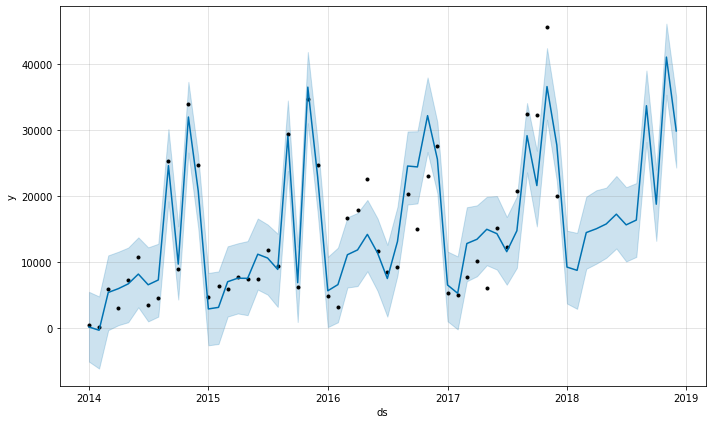

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(


,Region,ds,yhat,yhat_lower,yhat_upper
0,South,2014-01-01,5474.042250,-198.697994,11151.465060
1,South,2014-02-01,3116.463497,-2756.705020,8690.293088
2,South,2014-03-01,14054.126336,8423.888902,19831.073274
3,South,2014-04-01,6539.138730,644.257239,11900.785852
4,South,2014-05-01,4530.499405,-1483.105518,10264.927827
...,...,...,...,...,...
235,East,2018-08-01,16382.690898,10799.780843,21984.908963
236,East,2018-09-01,33704.330478,28219.323276,39035.999544
237,East,2018-10-01,18783.949342,13229.300329,24025.459789
238,East,2018-11-01,41069.559525,35363.907657,46136.294640


In [4]:
regressao_region = regressao(data, 'Region', 'Order Date Month', 'Sales')
regressao_region.to_feather('tavbase/regressao_regiao.feather')
regressao_region

00:42:57 - cmdstanpy - INFO - Chain [1] start processing


Consumer


00:42:57 - cmdstanpy - INFO - Chain [1] done processing


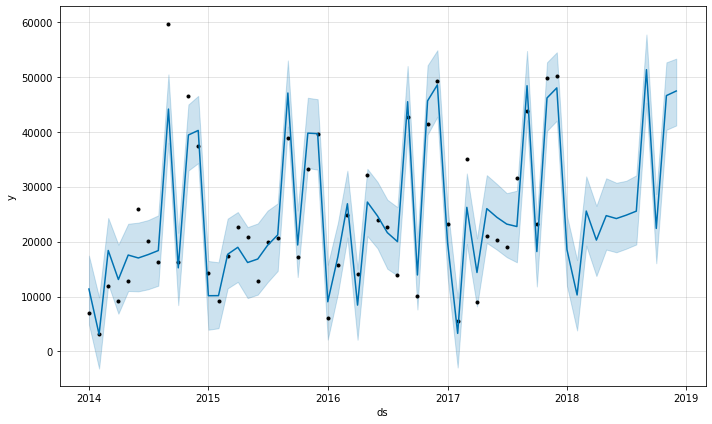

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
00:42:57 - cmdstanpy - INFO - Chain [1] start processing


Corporate


00:42:58 - cmdstanpy - INFO - Chain [1] done processing


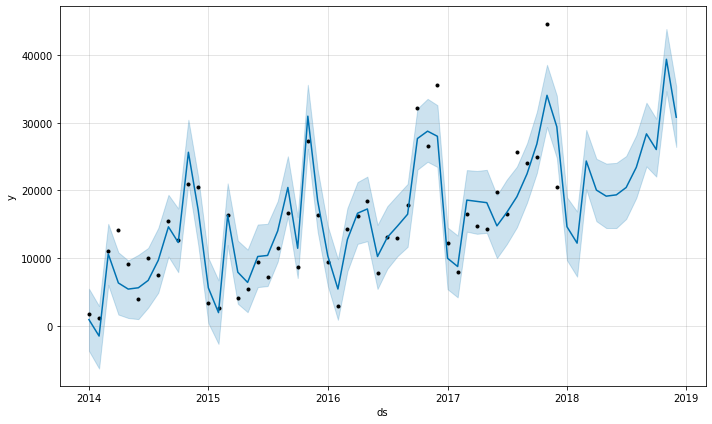

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
00:42:58 - cmdstanpy - INFO - Chain [1] start processing


Home Office


00:42:58 - cmdstanpy - INFO - Chain [1] done processing


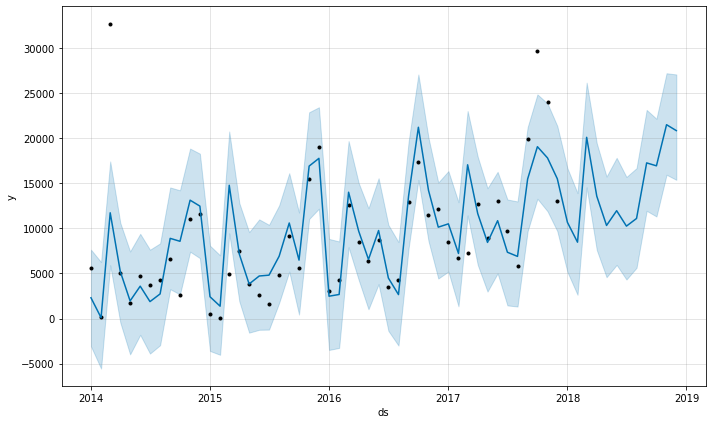

C:\Users\duduf\AppData\Local\Temp\ipykernel_16644\2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(


,Segment,ds,yhat,yhat_lower,yhat_upper
0,Consumer,2014-01-01,11366.305511,4902.943418,17454.103568
1,Consumer,2014-02-01,3106.669670,-3118.062014,9846.675480
2,Consumer,2014-03-01,18386.867794,12233.193822,24316.531584
3,Consumer,2014-04-01,13098.643034,6866.249040,19428.568737
4,Consumer,2014-05-01,17552.784067,11006.676694,23250.895093
...,...,...,...,...,...
175,Home Office,2018-08-01,11105.262772,5633.063328,16685.740923
176,Home Office,2018-09-01,17268.807363,11952.154349,23145.604500
177,Home Office,2018-10-01,16943.473794,11325.849399,22161.622498
178,Home Office,2018-11-01,21504.845921,15953.539414,27213.466590


In [5]:
regressao_segment = regressao(data, 'Segment', 'Order Date Month', 'Sales')
regressao_segment.to_feather('tavbase/regressao_segment.feather')
regressao_segment